Assignment 1

Dibuat Oleh : Fajri Sofianto
Tanggal : 17 Agustus 2023

link CSV : https://www.kaggle.com/datasets/jboysen/london-crime

Guna membuat visualisasi data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#df = pd.read_csv('D:\File_Analisa_Python\london_crime.csv')
df = pd.read_csv('london_crime.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [3]:
df.isnull().sum()                   #cek data kosong
df['yearmonth'] = df['year'].astype(str) + '-' + df['month'].astype(str)    #tambah kolom tahunbulan sebagai date

df['yearmonth'] = pd.to_datetime(df['yearmonth'],format='%Y-%m')             #convert ke date
df.info()

class color:      # untuk warna teks penjelasan grafik
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   lsoa_code       object        
 1   borough         object        
 2   major_category  object        
 3   minor_category  object        
 4   value           int64         
 5   year            int64         
 6   month           int64         
 7   yearmonth       datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 823.4+ MB


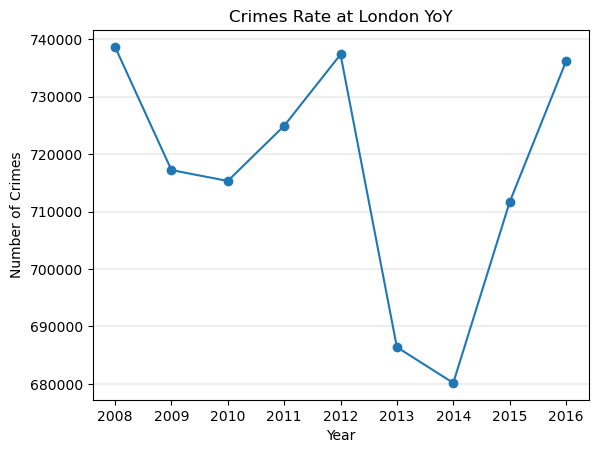

For 2012 to 2014, London Crime rate has dropped significantly about 5.000 case But in 2014 to 2016, number of crimes in London back to level 73.000 this trend is robberies and assaulted committed by individuals riding mopeds,
Crime involving mopeds roses by more than 600% in London between 2014 - 2016 | source : https://en.wikipedia.org/wiki/Crime_in_London


In [4]:
df_yearly = df[['year', 'value']]

df_yearly.groupby('year').sum('value').plot(marker = 'o',
                                            legend=False)
plt.ylabel('Number of Crimes')
plt.title('Crimes Rate at London YoY')
plt.xlabel('Year')
plt.grid(axis='y',
         linewidth =0.3)
plt.show()
print('For 2012 to 2014, London Crime rate has dropped significantly about 5.000 case '\
      'But in 2014 to 2016, number of crimes in London back to level 73.000 this '\
      'trend is robberies and assaulted committed '\
      'by individuals riding mopeds,')
print('Crime involving mopeds roses by more than 600% in London between 2014 - 2016 '\
      '| source : https://en.wikipedia.org/wiki/Crime_in_London')

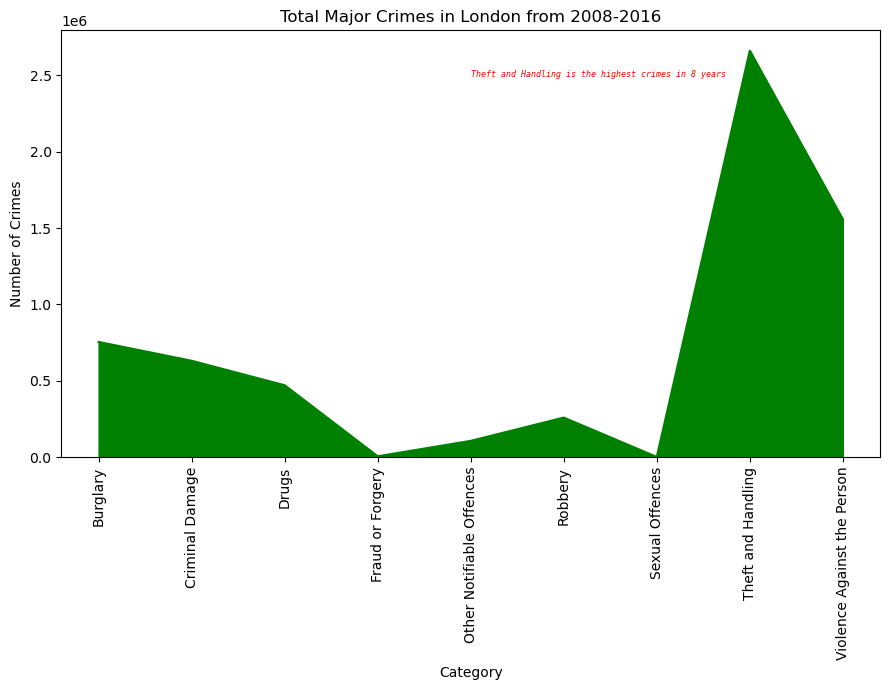

Theft and Handling is the highest crime among major categories in London for about 2,6 million total case in 8 years


In [35]:
df_major_category = df[['major_category', 'value']]

df_major_category = df_major_category.groupby('major_category').sum('value')

df_major_category.plot(kind='area',
                                                            legend=False,
                                                            color='green',
                                                            figsize=(9,7)
                                                            )
plt.ylabel('Number of Crimes')
plt.xlabel('Category')
plt.title('Total Major Crimes in London from 2008-2016')
plt.xticks(rotation=90)
plt.text(4,2490000,'Theft and Handling is the highest crimes in 8 years',
         fontsize=6,
         family='monospace',
         style='italic',
         color='red')
plt.tight_layout()
plt.show()

print(color.RED+'Theft and Handling is the highest crime among major categories in London for about 2,6 million total case in 8 years'+color.END)

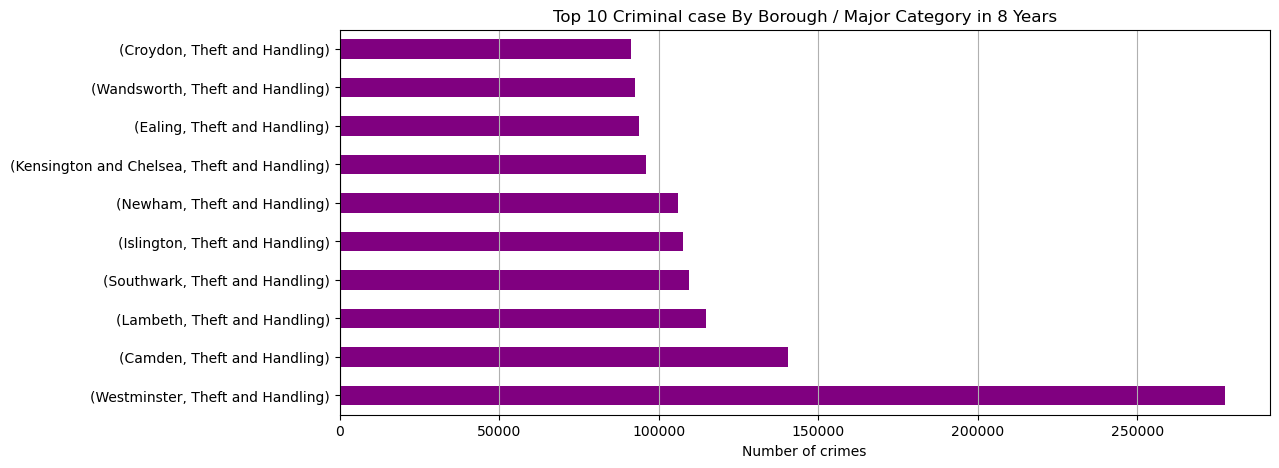

For 8 Years, Theft and Handling is the most highest criminal in top 10 borough


In [27]:
df_bar = df[['borough','major_category','value']]

df_bar = df_bar.groupby(['borough', 'major_category']).sum('value')

df_bar.sort_values(by='value', ascending=False).head(10).plot(kind='barh', figsize=(12,5), 
                                                              legend=False,
                                                              color='purple')
plt.title('Top 10 Criminal case By Borough / Major Category in 8 Years')
plt.ylabel('')
plt.xlabel('Number of crimes')
plt.grid(axis='x')
plt.show()

print(color.RED + 'For 8 Years, Theft and Handling is the most highest criminal in top 10 borough' + color.END)

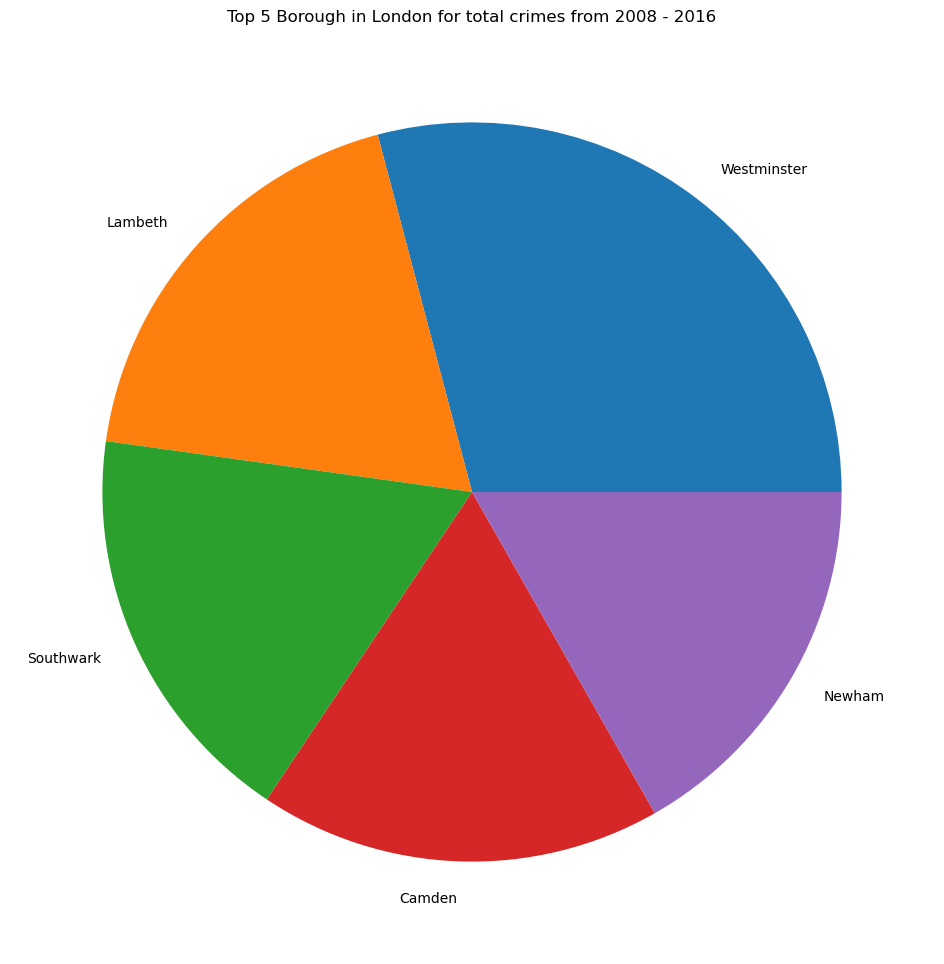

Westminster become most highest crime rate in London due to one of the highest population and parts of Westminster are in the centre of the city. there are 1.580 crimes per square kilometer
source:https://tinyurl.com/2m6twr8s


In [37]:
df_borough = df[['borough','value']]

df_borough = df_borough.groupby('borough').sum('value')

pie = df_borough.sort_values(by=('value'), ascending=False).head(5)

pie.plot.pie(y='value', figsize=(12,12), legend=False)
plt.ylabel('')
plt.title('Top 5 Borough in London for total crimes from 2008 - 2016')
plt.show()

print(color.RED+'Westminster become most highest crime rate in London due to one of the highest population '\
      'and parts of Westminster are in the centre of the city. there are 1.580 crimes per square kilometer'+color.END)
print('source:https://tinyurl.com/2m6twr8s')

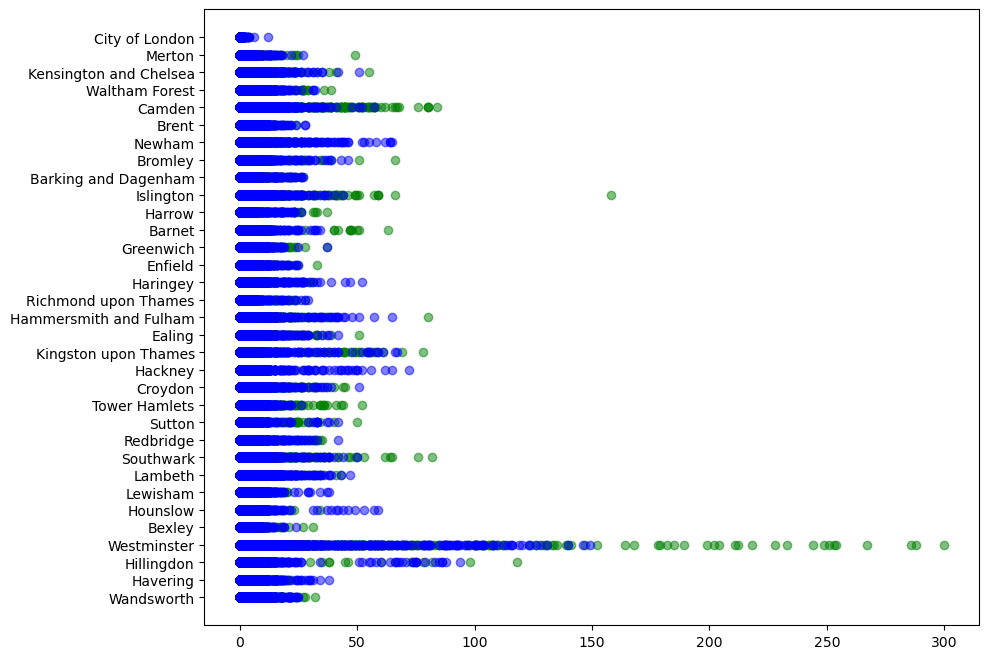

All Borough shows increasing in Crimes from 2008 (Blue) to 2016 (Green), except for City of London, Brent, Barking & Dagenham, Richmond, Hackney, Redbridge, Lambeth, Lewisham, Hounslow, and Havering


In [25]:
scat = df[['year','borough','major_category','value']]

scat_1 = scat[scat['year'] == 2008]

scat_2 = scat[scat['year'] == 2016]

plt.figure(figsize=(10,8))
plt.scatter(scat_1['value'], scat_1['borough'], alpha=0.5, color='green')
plt.scatter(scat_2['value'], scat_2['borough'], alpha=0.5, color='blue')
plt.show()

print(color.RED +'All Borough shows increasing in Crimes from 2008'+ color.BLUE +' (Blue) ' + color.RED + 'to 2016 ' + color.GREEN + '(Green)' +color.RED+ ', except for City of London, Brent, Barking & Dagenham, Richmond, Hackney, Redbridge, Lambeth, Lewisham, Hounslow, and Havering'+color.END)

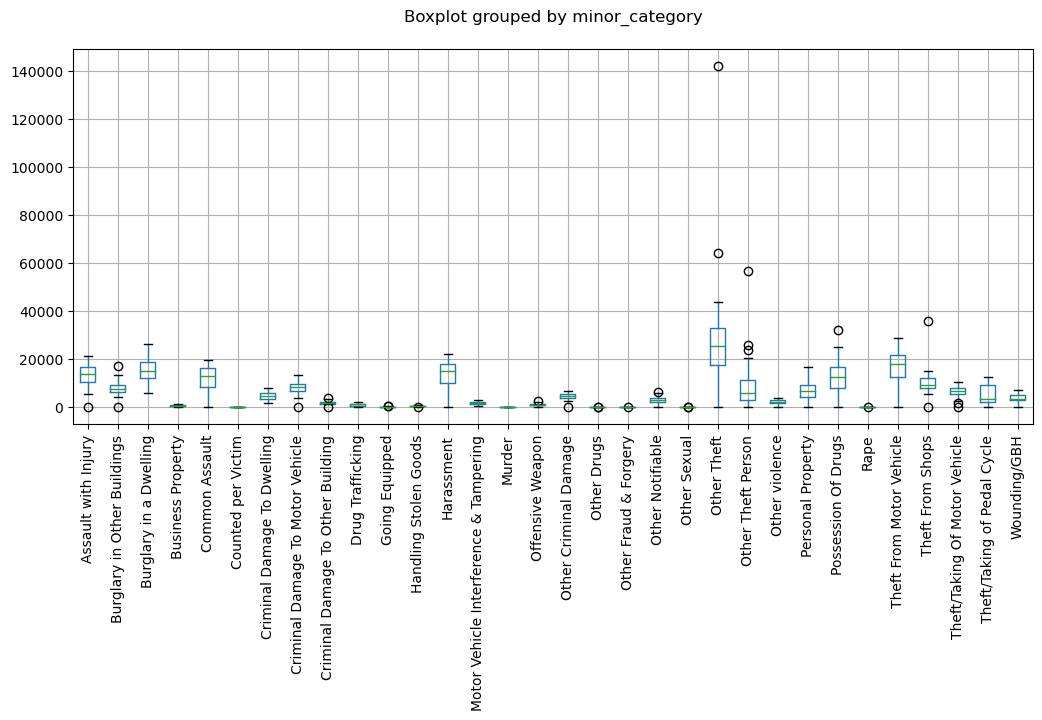

Other Theft has Maximum total number of crimes about 140 thousand, while average of crimes is about 30 thousand crimes for 8 years


In [9]:
dfbox = df[['major_category', 'borough', 'minor_category', 'value']] 
dfbox = dfbox.groupby(['borough', 'major_category', 'minor_category']).sum(numeric_only=True)

dfbox.boxplot(column="value", by="minor_category", figsize=(12, 5), rot = 90)
plt.title('')
plt.xlabel('')
plt.show()

print(color.RED + 'Other Theft has Maximum total number of crimes about 140 thousand, while average of crimes is about 30 thousand crimes for 8 years' + color.END)